<h2>Categorical Variables and One Hot Encoding</h2>

<img src="cat.jpg" />

<img src="lbl.jpg" />

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("/content/2024-09-19T17-47-58.554Z-canada_per_capita_income (1).csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [15]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


Text(0.5, 1.0, 'Income per year')

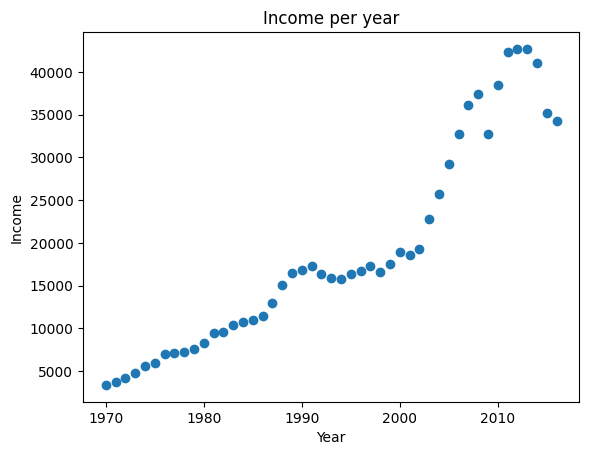

In [20]:
plt.scatter(df.year,df['per capita income (US$)'])
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income per year')

In [22]:
df.isnull().sum()

,0
year,0
per capita income (US$),0


In [32]:
x=df.drop(['per capita income (US$)'],axis='columns')
y=df['per capita income (US$)']

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
x_train.shape

(37, 1)

In [35]:
y_train.shape

(37,)

In [38]:
x_test

,year
7,1977
18,1988
42,2012
28,1998
11,1981
41,2011
34,2004
20,1990
8,1978
45,2015


In [39]:
y_test

,per capita income (US$)
7,7100.126170
18,15080.283450
42,42665.255970
28,16622.671870
11,9434.390652
41,42334.711210
34,25719.147150
20,16838.673200
8,7247.967035
45,35175.188980


In [40]:
from sklearn.linear_model import LinearRegression
lR=LinearRegression()
lR.fit(x_train,y_train)

LinearRegression()

In [43]:
lR.coef_

array([803.30262346])

In [44]:
lR.intercept_

-1582325.1748014388

In [45]:
lR.predict(x_test)

array([ 5804.11178824, 14640.44064636, 33919.70360951, 22673.466881  ,
        9017.3222821 , 33116.40098604, 27493.28262179, 16247.04589329,
        6607.41441171, 36329.6114799 ])

In [53]:
pd.DataFrame(np.c_[x_test,y_test,lR.predict(x_test)],columns=['year','per capita income (US$)','predicted income'])

,year,per capita income (US$),predicted income
0,1977.0,7100.126170,5804.111788
1,1988.0,15080.283450,14640.440646
2,2012.0,42665.255970,33919.703610
3,1998.0,16622.671870,22673.466881
4,1981.0,9434.390652,9017.322282
5,2011.0,42334.711210,33116.400986
6,2004.0,25719.147150,27493.282622
7,1990.0,16838.673200,16247.045893
8,1978.0,7247.967035,6607.414412
9,2015.0,35175.188980,36329.611480


Fine tune our model

In [57]:
lR.score(x_test,y_test)

0.881198658246739